핸즈온 7장 앙상블 학습과 랜덤 포레스트 p.257 ~ 272(7.5 ~ )

In [2]:
import warnings
warnings.filterwarnings('ignore')

# import package
import numpy as np
import os

#5장에서 소개한 moons dataset 불러오기
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y = make_moons(n_samples=100, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 7.5 부스팅

부스팅(가설 부스팅) : 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법
- 에이다부스트
- 그레이디언트 부스팅

### 7.5.1 에이다부스트

- 이전 예측기를 보완하는 새로운 예측기를 만드는 방법
- 이전 모델이 과소적합했던 훈련 샘플의 가중치를 더 높이는 것
- 새로운 예측기는 학습하기 어려운 샘플에 점점 더 맞추어짐

첫 번째 분류기를 훈련 세트에서 훈련시키고 예측 만들기

-> 알고리즘이 잘못 분류된 훈련 샘플의 가중치를 상대적으로 높이기

-> 두 번째 분류기는 업데이트된 가중치를 사용해 훈련 세트에서 훈련하고 다시 예측을 만듦

-> 다시 가중치를 업데이트

 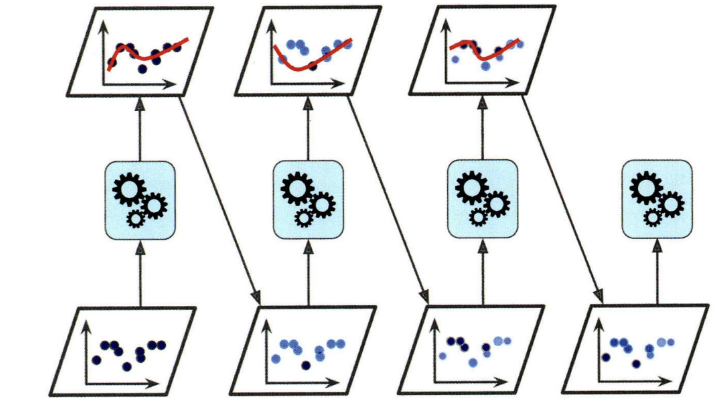

moons 데이터셋에 훈련시킨 다섯 개의 연속된 예측기의 결정 경계

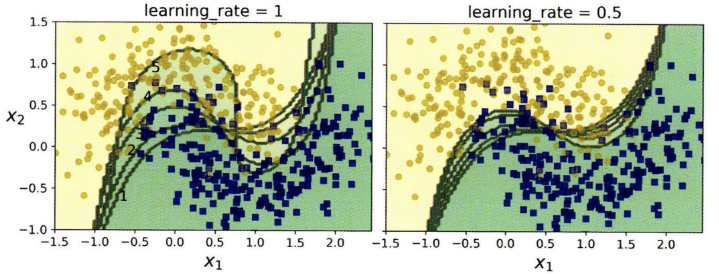

첫 번째 분류기가 많은 샘플을 잘못 분류

-> 샘플들의 가중치가 높아짐

-> 두 번째 분류기는 더 정확하게 예측

에이다부스트 알고리즘

- 각 샘플 가중치 W는 초기에 1/m 으로 초기화
- 첫 번째 예측치가 학습 -> 가중치가 적용된 에러율 (r1)이 훈련 세트에 대해 계산됨


j번째 예측기의 가중치가 적용된 에러율

 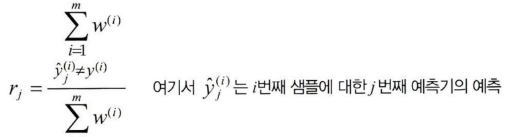

예측기의 가중치 계산
- 예측기가 정확할수록 가중치가 더 높아짐
- 무작위로 예측하는 정도 : 가중치는 0에 가까움
- 예측 정도가 더 나쁘면 : 가중치는 음수

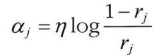

에이다부스트 알고리즘의 가중치 업데이트 규칙
- 잘 못 분류된 샘플의 가중치가 증가함

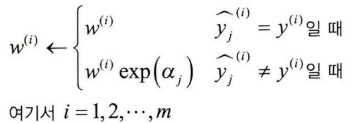

이후, 모든 샘플의 가중치를 정규화 함

마지막으로, 새 예측기가 업데이트된 가중치를 사용해 훈련되고 전체 과정이 분복됨

에이다부스트 예측
- 가중치의 합이 가장 큰 클래스가 예측 결과가 됨

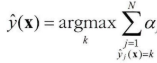

사이킷런의 SAMME
- 에이다부스트의 다중 클래스 버전
- 클래스가 두 개 -> 에이다부스트와 동일함

사이킷런의 AdaBoostClassifier를 사용하여 200개의 얕은 결정 트리를 기반으로 하는 에이다부스트 분류기를 훈련시키기

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm='SAMME', learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

### 7.5.2 그레이디언트 부스팅
그레이디언트 부스팅
- 앙상블에 이전까지의 오차를 보정하도록 예측기를 순차적으로 추가
- 이전 예측기가 만든 잔여 오차에 새로운 예측기를 학습시킴

그레이디언트 트리 부스팅 (그레이디언트 부스티드 회귀 트리)
- 결정 트리를 기반 예측기로 사용하는 간단한 회귀 문제 풀이
- DecisionTreeRegressor를 훈련 세트에 학습시키기

DecisionTreeRegressor를 훈련 세트(잡음이 섞인 2차 곡선 형태의 훈련 세트)에 학습시키기

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2)

첫 번째 예측기에서 생긴 잔여 오차에 두 번째 DecisionTreeRegressor를 훈련시키기

In [8]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2)

두 번째 예측기가 만든 잔여 오차에 세 번째 회귀 모델을 훈련시키기

In [9]:
y3 = y2 - tree_reg1.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2)

=> 세 개의 트리를 포함하는 앙상블 모델 제작 완료

새로운 샘플에 대한 예측을 만들기 위해 모든 트리의 예측을 더하기

In [10]:
#y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

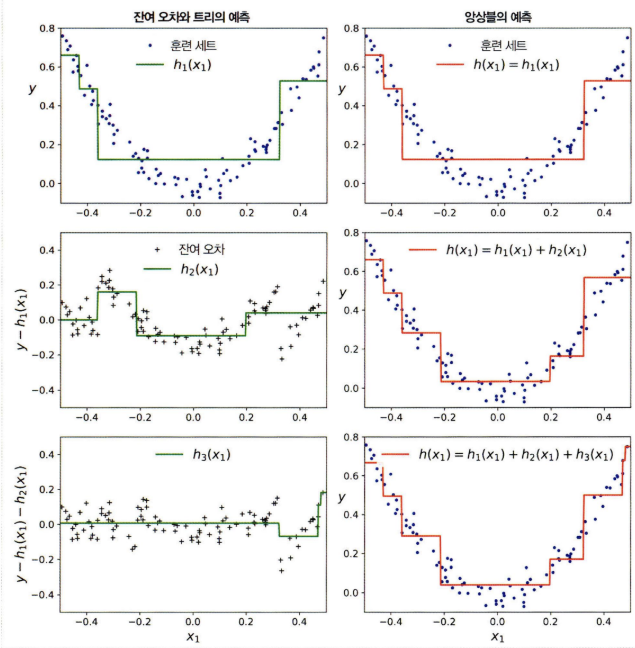

사이킷런의 GradientBoostingClassifier를 사용하여 GBRT 앙상블을 간단하게 훈련 시키기

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth = 2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X,y)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=3)

learning_rate 매개변수
- 각 트리의 기여 정도를 조절
- 축소
 - 0.1처럼 낮게 설정
 - 앙상블을 훈련 세트에 학습시키기 위해 많은 트리가 필요
 - 예측의 성능은 좋아짐

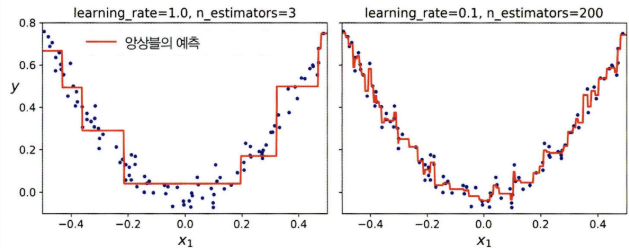

- 왼쪽은 훈련 세트를 학습하기에 트리가 불충분

- 오른쪽은 트리가 너무 많아 훈련 세트에 과대적합됨

최적의 트리 수 찾기 위해 조기 종료 기법 사용하기
- staged_predict() 메서드 사용

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_val, y_train, y_val = train_test_split(X,y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)+1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=67)

조기 종료를 사용하여 트리 수 튜닝

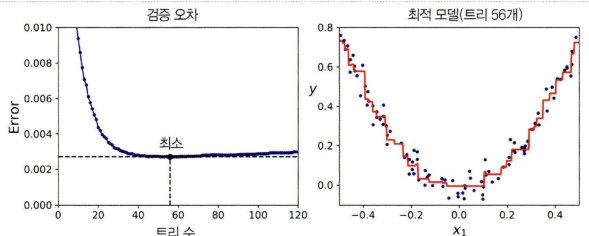

warm_start=True : 사이킷런이 fit() 메서드가 호출될 때 기존 트리를 유지하고 훈련을 추가할 수 있도록 함

In [14]:
gbrt = GradientBoostingRegressor(max_depth = 2, warm_start=True)

min_val_error = float('inf')
error_going_up = 0

for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error :
        min_val_error = val_error
        error_going_up = 0
    else :
        error_going_up += 1
        if error_going_up == 5 :
            break # 조기종료

확률적 그레이디언트 부스팅
- 각 트리가 훈련할 때 사용할 훈련 샘플의 비율을 지정하는 subsample 매개변수
- subsample = 0.25 : 각 트리는 무작위로 선택된 25%의 훈련 샘플로 학습
 - 편향이 높아지고 분산이 낮아짐, 속도가 빨라짐


XGBoost 라이브러리 : 최적화된 그레이디언트 부스팅 구현으로 가장 유명


In [15]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

- 자동 조기 종료 기능 제공

In [17]:
xgb_reg = xgboost.XGBRegressor(early_stopping_rounds = 2)
xgb_reg.fit(X_train, y_train,
            eval_set = [(X_val, y_val)])
y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:0.38947
[1]	validation_0-rmse:0.32635
[2]	validation_0-rmse:0.28689
[3]	validation_0-rmse:0.26754
[4]	validation_0-rmse:0.25925
[5]	validation_0-rmse:0.25746
[6]	validation_0-rmse:0.24309
[7]	validation_0-rmse:0.23300
[8]	validation_0-rmse:0.22655
[9]	validation_0-rmse:0.22773
[10]	validation_0-rmse:0.22534
[11]	validation_0-rmse:0.22349
[12]	validation_0-rmse:0.22514


## 7.6 스태킹

새로운 샘플에 회귀 작업을 수행하는 앙상블
- 세 예측기는 각각 다른 값을 예측 -> 마지막 예측기 (블렌더, 메타학습기)가 이 예측을 입력으로 받음 ->  최종 예측을 만듦

 - 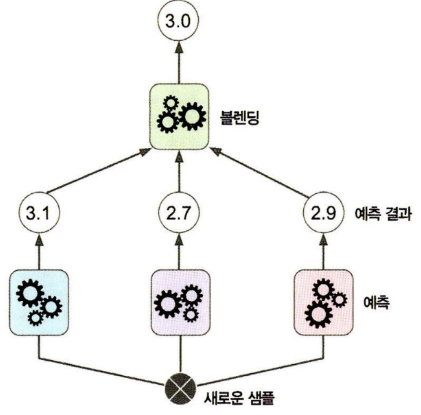

블렌더 학습을 위해 홀드 아웃 세트를 사용
- 훈련 세트를 두 개의 서브셋으로 나눔
- 첫 번째 서브셋은 첫 번째 레이어의 예측을 훈련시키기 위해 사용
 - 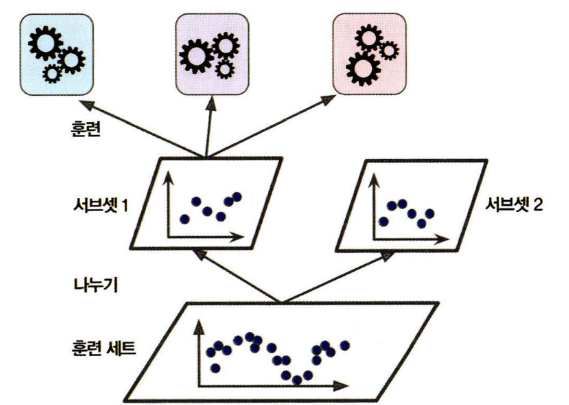

- 첫 번째 레이어의 예측기를 사용해 두 번째(홀드아웃) 세트에 대한 예측 만듦
- 홀드 아웃 세트의 각 샘플에 대해 세 개의 예측값이 존재
- 블렌더가 새 훈련 세트로 훈련됨 (첫 번째 레이어의 예측을 가지고 타깃값을 예측하도록 학습됨)

 - 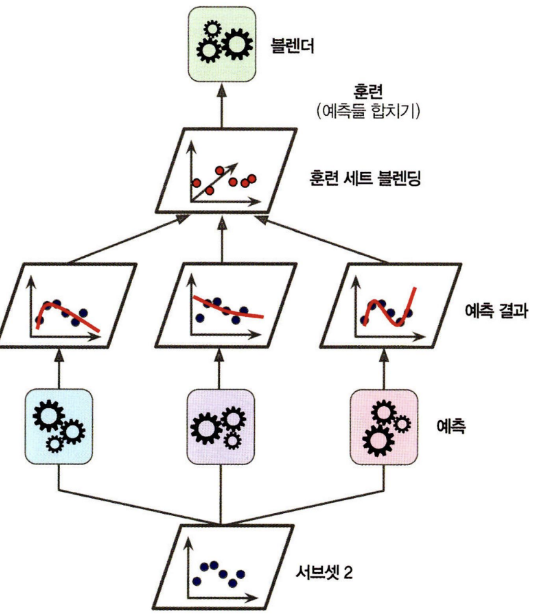

블렌더를 여러 개 훈련시키는 것도 가능함

(ex : 하나는 선형 회귀, 다른 하나는 랜덤 포레스트 회귀로)

- 훈련 세트를 세 개의 서브셋으로 나눔
- 첫 번째 세트 : 첫 번째 레이어를 훈련 시키는 데 사용
- 두 번째 세트 : (첫 번째 레이어의 예측기) 두 번째 레이어를 훈련시키기 위한 훈련 세트를 만드는 데 사용
- 세 번째 세트 : (두 번째 레이어의 예측기) 세 번째 레이어를 훈련시키기 위한 훈련 세트를 만드는 데 사용

 - 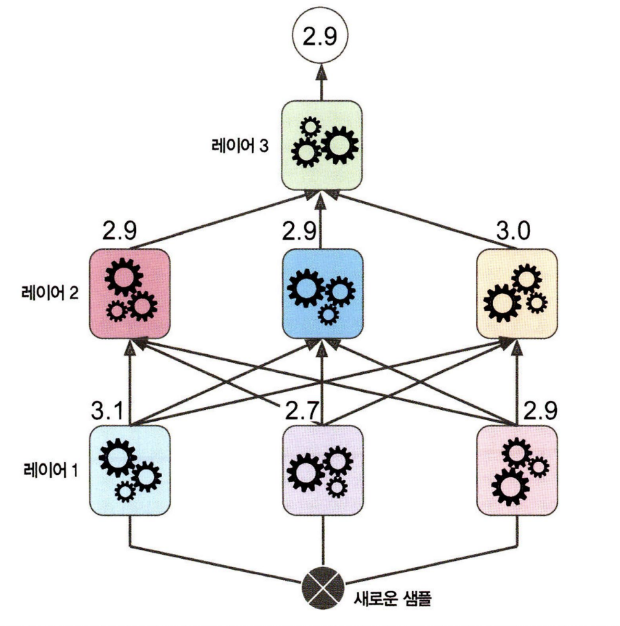

사이킷런은 스태킹을 직접 지원하지 않음 -> 직접 구현